In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
datos_bolsa= pd.read_csv("/content/Index2018.csv", )

In [ ]:
datos_bolsa

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


Explorando la DATA

In [ ]:
datos_bolsa.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


Estadistica descriptiva de nuestra base de datos

In [ ]:
datos_bolsa.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


Analizaremos la cantidad de NA en nuestra base de datos. La inclusión de NA es algo preocupante en una serie de tiempo.

Mediante este comando observamos todas las observaciones y conocer si es NA.

Esto es poco practico igual porque no podemos ver toda la data

In [ ]:
datos_bolsa.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


Obtendremos un resumen de la cantidad de NA por variable

In [ ]:
datos_bolsa.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Queremos observar solamente una variable porque analizaremos nuestra serie temporal con solamente una variable (en este caso con el SP500)

In [ ]:
datos_bolsa.isna().spx.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
6264    False
6265    False
6266    False
6267    False
6268    False
Name: spx, Length: 6269, dtype: bool>

# Graficamos de manera sencilla

In [ ]:
import matplotlib.pyplot as plt


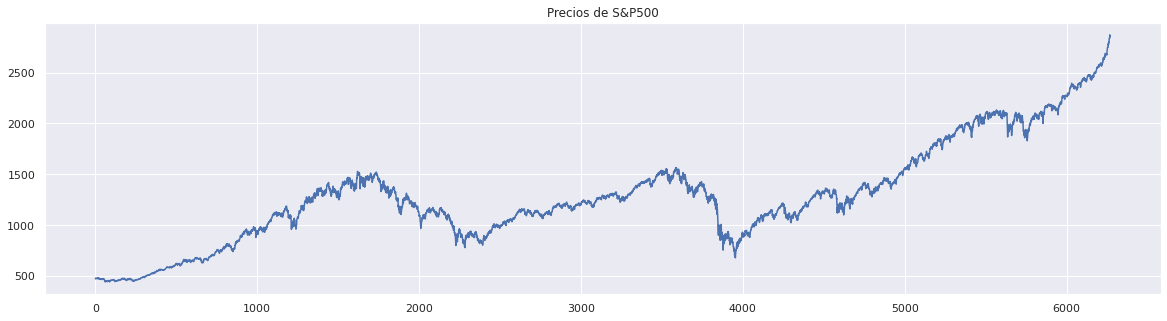

In [ ]:
 datos_bolsa.spx.plot(figsize=(20,5), title= "Precios de S&P500")
 plt.show()

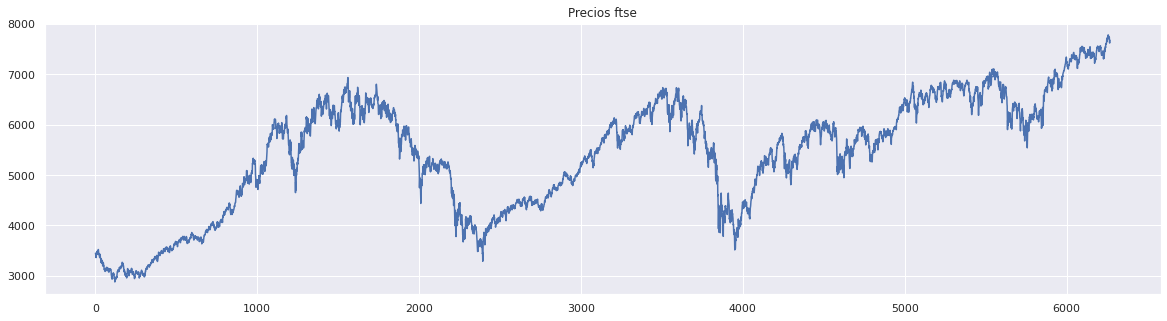

In [ ]:
datos_bolsa.ftse.plot(figsize=(20,5), title= "Precios ftse")
plt.show()

### Compararemos la evolución de la serie temporal

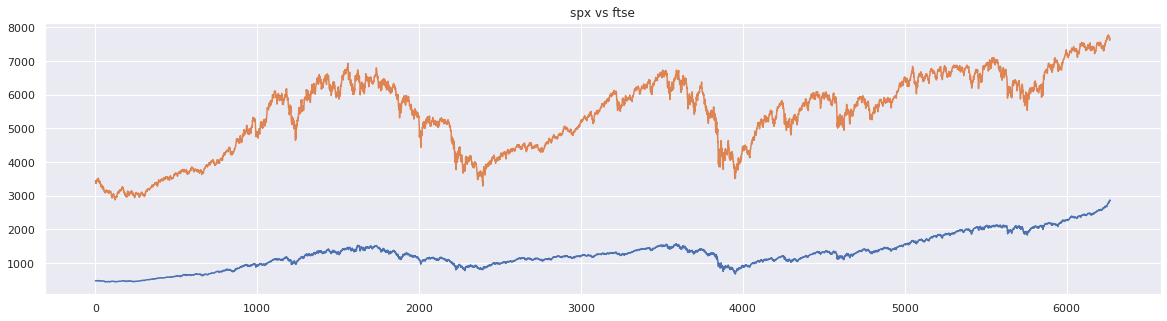

In [ ]:
datos_bolsa.spx.plot(figsize=(20,5), title= "Precios spx")
datos_bolsa.ftse.plot(figsize=(20,5), title= "Precios de ftse")
plt.title("spx vs ftse")
plt.show()

## El Gráfico QQ

El grafico cuantil cuantil nos sirve para explicar si un grupo de datos se comporta con una distribución normal  

In [ ]:
import scipy.stats

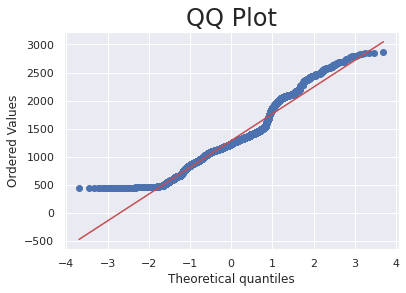

In [ ]:
scipy.stats.probplot(datos_bolsa.spx, plot= plt)
plt.title("QQ Plot", size= 24)
plt.show()

Eje Y corresponde al precio ordenado


El eje horizontal muestra cuantas desviaciones estandar están alejada los valores 


Los datos no se distribuyen de manera normal (lo esperabamos y es algo común en las series de tiempo).

## Transformación de datos

In [ ]:
datos_bolsa.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

La información que tenemos en un primer momento nos parece adecuada para nuestro análisis pero tenemos que analizar la información con más cuidado porque esta información recién señalada tiene un "error"

### Convertiremos la columna date a un tipo de datos datetime

In [ ]:
datos_bolsa.date= pd.to_datetime(datos_bolsa.date, dayfirst= True)

In [ ]:
datos_bolsa.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
datos_bolsa.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [ ]:
print(type(datos_bolsa.date))

<class 'pandas.core.series.Series'>


Ocuparemos la fecha como indice de nuestros datos, ya que podemos hablar respecto al cierre de un día determinado

In [ ]:
datos_bolsa.set_index("date", inplace=True)

In [ ]:
datos_bolsa.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


Configurar la frecuencia de los datos

In [ ]:
datos_bolsa_2= datos_bolsa.asfreq('d')

In [ ]:
datos_bolsa_2.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


Ahora tenemos datos faltantes... ¿Qué ocurre?

In [ ]:
datos_bolsa3= datos_bolsa.asfreq('b')

In [ ]:
datos_bolsa3.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Datos Faltantes

In [ ]:
datos_bolsa3.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [ ]:
datos_bolsa.spx= datos_bolsa.spx.fillna(method= 'ffill')

In [ ]:
datos_bolsa.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [ ]:
datos_bolsa.ftse= datos_bolsa.ftse.fillna(method= 'bfill')

In [ ]:
datos_bolsa.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [ ]:
datos_bolsa.dax= datos_bolsa.dax.fillna(method= 'bfill')

In [ ]:
datos_bolsa.nikkei= datos_bolsa.nikkei.fillna(method= 'ffill')

In [ ]:
#datos_bolsa.nikkei= datos_bolsa.nikkei.fillna(value= df_comp.dax.mean)


In [ ]:
datos_bolsa.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [ ]:
datos_bolsa['valor_mercado']=datos_bolsa.spx

In [ ]:
datos_bolsa.describe()

,spx,dax,ftse,nikkei,valor_mercado
count,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700,1288.127542
std,487.586473,2754.361032,1145.572428,4043.122953,487.586473
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,990.671905,4069.350000,4486.100000,10709.290000,990.671905
50%,1233.420000,5773.340000,5662.430000,15028.170000,1233.420000
75%,1459.987747,7443.070000,6304.250000,17860.470000,1459.987747
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


Eliminar una variable

In [ ]:
del datos_bolsa['spx']

In [ ]:
datos_bolsa.describe()

,dax,ftse,nikkei,valor_mercado
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,6080.063363,5422.713545,14597.055700,1288.127542
std,2754.361032,1145.572428,4043.122953,487.586473
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4069.350000,4486.100000,10709.290000,990.671905
50%,5773.340000,5662.430000,15028.170000,1233.420000
75%,7443.070000,6304.250000,17860.470000,1459.987747
max,13559.600000,7778.637689,24124.150000,2872.867839


Eliminar varias columnas al mismo tiempo

In [ ]:
del datos_bolsa['dax']
del datos_bolsa['ftse']
del datos_bolsa['nikkei']

In [ ]:
datos_bolsa.describe()

,valor_mercado
count,6269.000000
mean,1288.127542
std,487.586473
min,438.920000
25%,990.671905
50%,1233.420000
75%,1459.987747
max,2872.867839


## División de los datos 
### Datos de entrenamiento y prueba para el machine learning

In [ ]:
size= int(len(datos_bolsa)*0.80)

In [ ]:
size

5015

In [ ]:
df= datos_bolsa.iloc[:size]

In [ ]:
df_test = datos_bolsa.iloc[size:]

In [ ]:
df.tail()

,valor_mercado
date,
2013-03-28,1569.185872
2013-03-29,1569.185872
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


In [ ]:
df_test.head()

,valor_mercado
date,
2013-04-04,1559.979316
2013-04-05,1553.278930
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827


# Ruido Blanco

Es una serie temporal que no sigue ningún patrón, reina el caos en su distribución. Al no encontrar un patrón no podemos predecir el futuro

Se necesitan 3 condiciones para considerar una serie de tiempo como ruido blanco

1.   Media constante

1.   Varianza constante
2.   Sin autocorrelaciones (no hay una correlación entre sus valores pasados y los presentes)

Por tanto, no podemos hacer proyecciones o predicciones con series que contengan ruido blanco.



# Random Walk

La idea básica de una caminata aleatoria es que el valor de mañana de una serie es el valor de hoy más un cambio impredecible



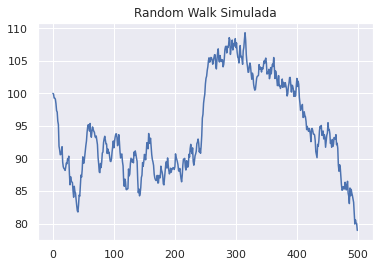

In [ ]:
# Generamos 500 pasos aleatorios para la caminara, con media 0 y desv tipica 1
steps = np.random.normal(loc=0, scale=1, size=500)
 
# Ponemos el primer elemento a 0 para que el precio inicial sea el que pongamos nosotros
steps[0]=0
 
# Simulando los precios P con un precio inicial de 100
P = 100 + np.cumsum(steps)
 
# Plot
plt.plot(P)
plt.title("Random Walk Simulada")
plt.show()